<a href="https://colab.research.google.com/github/awaisrauf/explorations/blob/main/MMDet_Inference_and_Train_with_Existing_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference and Train with Existing Datasets in MMDetection


- Inference on an image 
- Test on existing dataset
- Train on existing dataset

Referece: [link](https://mmdetection.readthedocs.io/en/latest/1_exist_data_model.html)


## Install Libraries

In [1]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 23688, done.
remote: Total 23688 (delta 0), reused 0 (delta 0), pack-reused 23688
Receiving objects: 100% (23688/23688), 35.37 MiB | 33.35 MiB/s, done.
Resolving deltas: 100% (16547/16547), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Running setup.py develop for mmdet


## Inference with Existing Models


MMdetection has many models and standard datasts. 

### With High Level API


In MMDet, a model is defined by a config file and a models parameters saved in a checkpoint file.

In [2]:
# get image
!wget https://www.akc.org/wp-content/uploads/2018/04/basset-hound-with-cat-closeup.jpg
!mkdir data
!mkdir data/imgs
!mv basset-hound-with-cat-closeup.jpg data/imgs/cat_dog.jpg

--2022-03-24 13:55:05--  https://www.akc.org/wp-content/uploads/2018/04/basset-hound-with-cat-closeup.jpg
Resolving www.akc.org (www.akc.org)... 23.185.0.4, 2620:12a:8001::4, 2620:12a:8000::4
Connecting to www.akc.org (www.akc.org)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85358 (83K) [image/jpeg]
Saving to: ‘basset-hound-with-cat-closeup.jpg’

basset-hound-with-c 100%[===================>]  83.36K  --.-KB/s    in 0.002s  

2022-03-24 13:55:05 (38.5 MB/s) - ‘basset-hound-with-cat-closeup.jpg’ saved [85358/85358]



### CNN-based Detector


In [3]:
# download weights
!wget https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_1x_coco/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth
!mkdir checkpoints
!mv faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth checkpoints/

--2022-03-24 13:55:09--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_1x_coco/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167290848 (160M) [application/octet-stream]
Saving to: ‘faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth’

faster_rcnn_r50_caf 100%[===================>] 159.54M  8.42MB/s    in 20s     

2022-03-24 13:55:30 (8.08 MB/s) - ‘faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth’ saved [167290848/167290848]



In [10]:

config_file_path = "/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py"
saved_model_path = "checkpoints/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth"
img_path = '/content/mmdetection/resources/coco_test_12510.jpg'

In [5]:
!mkdir results

load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth


/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


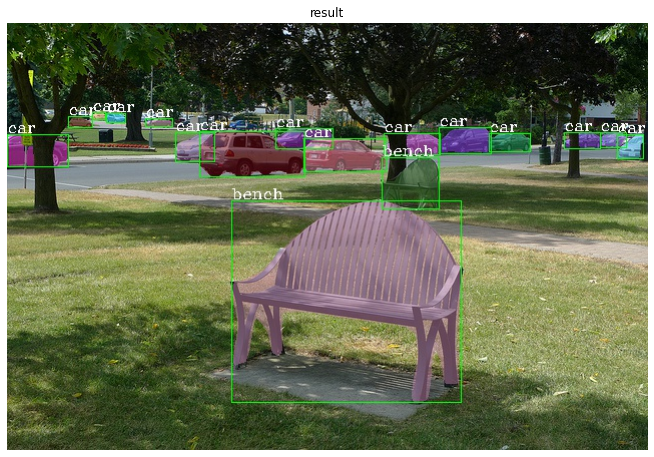

In [13]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

# create detector
detector = init_detector(config_file_path, saved_model_path, device='cuda:0')
result = inference_detector(detector, img_path)

# see the result
show_result_pyplot(detector, img_path, result)

# save results
detector.show_result(img_path, result, out_file="results/faster_rcnn.png")


### Demo with script


In [14]:
!python demo/image_demo.py $img_path $config_file_path $saved_model_path

load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth
/content/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
<Figure size 640.01x427.01 with 1 Axes>


This demo can also be done with webcam, video, etc. 

## Testing Pre-Trained Models on Standard Datasets



### Pascal Data

In [15]:
# download pascal voc
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

--2022-03-24 14:08:01--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  35.9MB/s    in 54s     

2022-03-24 14:08:54 (35.6 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [25]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

--2022-03-24 14:19:30--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  36.3MB/s    in 13s     

2022-03-24 14:19:43 (34.1 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]



In [ ]:
# unpack pascal voc
!tar xvf VOCtrainval_11-May-2012.tar

In [ ]:
!tar xvf VOCtrainval_06-Nov-2007.tar

In [27]:
# !mkdir data/
# !mv VOCdevkit/ data/VOCdevkit/
!mv VOCdevkit/VOC2007 data/VOCdevkit/VOC2007

Change following lines in PASCAL VOC dataset config file in `__base__/datasets/voc0712.py`
```python
    val=dict(
        type=dataset_type,
        ann_file=data_root + 'VOC2007/ImageSets/Main/val.txt',
        img_prefix=data_root + 'VOC2007/',
        pipeline=test_pipeline),
    test=dict(
        type=dataset_type,
        ann_file=data_root + 'VOC2007/ImageSets/Main/val.txt',
        img_prefix=data_root + 'VOC2007/',
        pipeline=test_pipeline))
```

### Test Models

In [18]:
!wget https://download.openmmlab.com/mmdetection/v2.0/pascal_voc/faster_rcnn_r50_fpn_1x_voc0712/faster_rcnn_r50_fpn_1x_voc0712_20200624-c9895d40.pth

--2022-03-24 14:13:44--  https://download.openmmlab.com/mmdetection/v2.0/pascal_voc/faster_rcnn_r50_fpn_1x_voc0712/faster_rcnn_r50_fpn_1x_voc0712_20200624-c9895d40.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166059536 (158M) [application/octet-stream]
Saving to: ‘faster_rcnn_r50_fpn_1x_voc0712_20200624-c9895d40.pth’

faster_rcnn_r50_fpn 100%[===================>] 158.37M  9.21MB/s    in 19s     

2022-03-24 14:14:05 (8.49 MB/s) - ‘faster_rcnn_r50_fpn_1x_voc0712_20200624-c9895d40.pth’ saved [166059536/166059536]



This script does three things
1. save all boxes to the pickle file.
2. save all the test set images with boxes in a library.
3. Overall results in mAP and recall, class-wise.

In [13]:
faster_rcnn_pascal_config = "/content/mmdetection/configs/pascal_voc/faster_rcnn_r50_fpn_1x_voc0712.py"
faster_rcnn_pascal_checkpoint = "faster_rcnn_r50_fpn_1x_voc0712_20200624-c9895d40.pth"

In [20]:
!python tools/test.py $faster_rcnn_pascal_config $faster_rcnn_pascal_checkpoint --out results/faster_rcnn_pascal_results1.pkl --eval mAP  --show-dir results/ 

/content/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
load checkpoint from local path: faster_rcnn_r50_fpn_1x_voc0712_20200624-c9895d40.pth
[                                                  ] 0/2510, elapsed: 0s, ETA:/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and 

```bash
!python tools/test.py $faster_rcnn_pascal_config $faster_rcnn_pascal_checkpoint --out results/faster_rcnn_pascal_results1.pkl --eval mAP  --show-dir results/ 

---------------iou_thr: 0.5---------------

+-------------+------+------+--------+-------+
| class       | gts  | dets | recall | ap    |
+-------------+------+------+--------+-------+
| aeroplane   | 155  | 453  | 1.000  | 0.956 |
| bicycle     | 177  | 545  | 1.000  | 0.945 |
| bird        | 243  | 567  | 0.984  | 0.902 |
| boat        | 150  | 614  | 0.980  | 0.884 |
| bottle      | 252  | 770  | 0.968  | 0.888 |
| bus         | 114  | 376  | 0.991  | 0.896 |
| car         | 625  | 1685 | 0.992  | 0.904 |
| cat         | 190  | 438  | 1.000  | 0.978 |
| chair       | 398  | 2269 | 0.972  | 0.863 |
| cow         | 123  | 417  | 1.000  | 0.935 |
| diningtable | 112  | 924  | 0.955  | 0.765 |
| dog         | 257  | 717  | 1.000  | 0.953 |
| horse       | 180  | 486  | 0.989  | 0.904 |
| motorbike   | 172  | 548  | 0.988  | 0.903 |
| person      | 2332 | 6157 | 0.982  | 0.897 |
| pottedplant | 266  | 1295 | 0.970  | 0.863 |
| sheep       | 127  | 418  | 0.976  | 0.884 |
| sofa        | 124  | 632  | 1.000  | 0.886 |
| train       | 152  | 469  | 0.993  | 0.908 |
| tvmonitor   | 158  | 526  | 0.987  | 0.901 |
+-------------+------+------+--------+-------+
| mAP         |      |      |        | 0.901 |
+-------------+------+------+--------+-------+
OrderedDict([('mAP', 0.900769829750061), ('AP50', 0.901)])
```

Running `test.py` with appropriate results file save the eval metric result into pkl file.

In [7]:
import pickle

path = "/content/mmdetection/results/faster_rcnn_pascal_results.pkl"
with open(path, 'rb') as f:
   results = pickle.load(f)


### Analysis

In [23]:
show_dir="/content/mmdetection/results/pascal_result_analysis"
prediction_path="/content/mmdetection/results/faster_rcnn_pascal_results1.pkl"
!python tools/analysis_tools/analyze_results.py $faster_rcnn_pascal_config $prediction_path $show_dir --topk 10

Traceback (most recent call last):
  File "tools/analysis_tools/analyze_results.py", line 205, in <module>
    main()
  File "tools/analysis_tools/analyze_results.py", line 194, in main
    cfg.data.test.pipeline = get_loading_pipeline(cfg.data.train.pipeline)
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/config.py", line 48, in __getattr__
    raise ex
AttributeError: 'ConfigDict' object has no attribute 'pipeline'


#### Gets flops of the model

In [24]:
!python tools/analysis_tools/get_flops.py $faster_rcnn_pascal_config

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
FasterRCNN(
  41.22 M, 100.000% Params, 206.758 GFLOPs, 100.000% FLOPs, 
  (backbone): ResNet(
    23.283 M, 56.484% Params, 84.077 GFLOPs, 40.664% FLOPs, 
    (conv1): Conv2d(0.0 M, 0.000% Params, 2.408 GFLOPs, 1.165% FLOPs, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(0.0 M, 0.000% Params, 0.033 GFLOPs, 0.016% FLOPs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(0.0 M, 0.000% Params, 0.016 GFLOPs, 0.008% FLOPs, inplace=True)
    (maxpool): MaxPool2d(0.0 M, 0.000% Params, 0.016 GFLOPs, 0.008% FLOPs, ker

### COCO Dataset

Datasets can also be downloaded with following scripts

[Reference](https://github.com/open-mmlab/mmdetection/blob/master/docs/en/useful_tools.md#dataset-download)
```bash
python tools/misc/download_dataset.py --dataset-name coco2017
python tools/misc/download_dataset.py --dataset-name voc2007
python tools/misc/download_dataset.py --dataset-name lvis
```

In [ ]:
!python tools/misc/download_dataset.py --dataset-name coco2017

## Train Models

Dataset training

- default learning rate in config file is for 8 GPUs and 2 imgs/gpu (batch_size = 8*2 = 16). 
- Need to set differnet leanring rate for different batch size

**References**
1. Accurate, Large Minibatch SGD: Training ImageNet in 1 Hour


In [1]:
ssd_config="/content/mmdetection/configs/pascal_voc/ssd300_voc0712.py"


In [ ]:
!python tools/train.py $ssd_config --work-dir results/ssd300_pascal/

/content/mmdetection/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/content/mmdetection/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
2022-03-24 15:46:37,352 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1.TC455_06.29190527_0
GCC: gcc (Ubun